In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

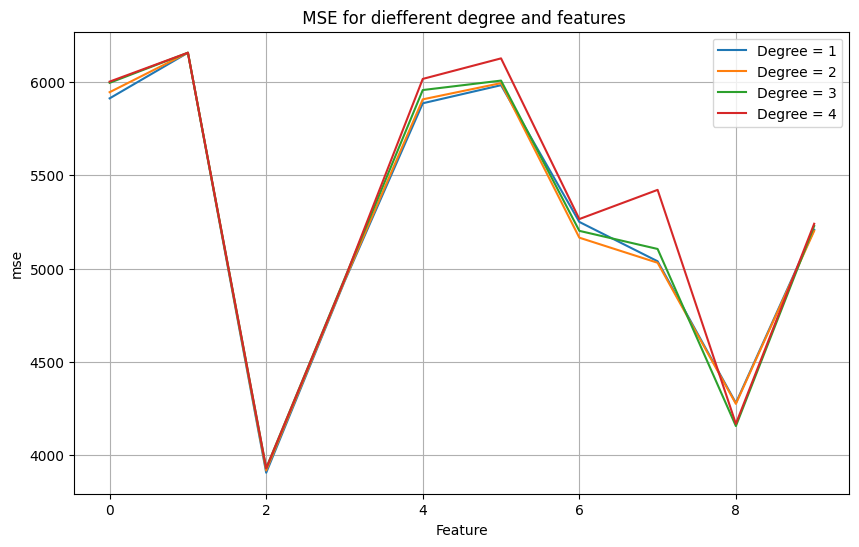

In [6]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Features
num_features = X.shape[1] 

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# function for cross validation with different feature and degree
def eval_poly_feature_regression(feature, degree):

    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge())
    
    # Cross-validation with 10 folds
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    X_f =  X_train[:, feature].reshape(-1,1)
    mse_scores = cross_val_score(model, X_f, y_train, cv=kf, scoring='neg_mean_squared_error')

    return -np.mean(mse_scores)  # Convert back to positive MSE

# Try polynomial degrees from 1 to 10
degree_up = 5
degrees = range(1, degree_up)
features = range(0, num_features)

global_mse_values = np.zeros((num_features, degree_up-1))

for d in degrees:
    for f in features:
        global_mse_values[f, d-1] = eval_poly_feature_regression(f, d)


plt.figure(figsize=(10, 6))

for d in degrees:
    plt.plot(features, global_mse_values[:, d-1], label= f"Degree = {d}")

plt.xlabel("Feature")
plt.ylabel("mse")
plt.title(" MSE for diefferent degree and features")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
global_mse_values

# Find values
min_mse_flat = np.argmin(global_mse_values)
min_mse_index = np.unravel_index(min_mse_flat, global_mse_values.shape)
best_feature = min_mse_index[0]
best_degree = min_mse_index[1]+1
print(f"Best feature is : {best_feature}")
print(f"Best degree : {best_degree}")


Best feature is : 2
Best degree : 1


In [4]:
model = make_pipeline(PolynomialFeatures(best_degree), StandardScaler(), Ridge())
Xf_train = X_train[:,best_feature].reshape(-1,1)
Xf_test  = X_test[:,best_feature].reshape(-1,1)
model.fit(Xf_train, y_train)

# Predictions
y_pred = model.predict(Xf_test)

# Performance Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Test Set MSE: {mse:.4f}")
print(f"Best Model R² Score: {r2:.4f}")


Best Model Test Set MSE: 4058.7237
Best Model R² Score: 0.2339
